# 最急降下法

## データ準備

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('../csv/sample_data.csv')
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


## データの可視化

<Axes: xlabel='space', ylabel='rent'>

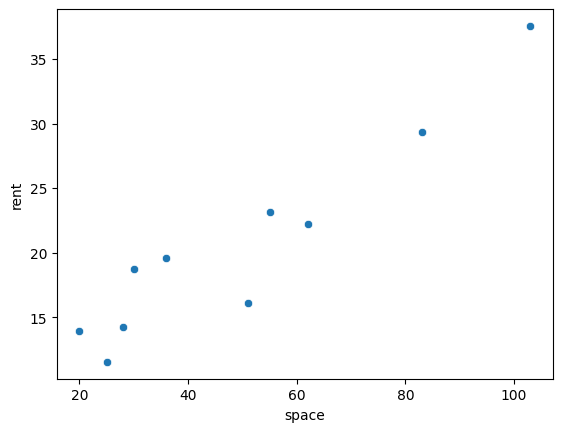

In [6]:
sns.scatterplot(x='space', y='rent', data=df)

## 損失関数定義

In [138]:
import numpy as np

x = df['space'].values
y = df['rent'].values

def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y - (theta_0 + theta_1 * x)))
cost_func(2, 3, x, y)

21664.319648883382

## 損失関数の可視化の試し

In [135]:
x = np.array([1,2,3,4])
y = np.array([10, 20, 30, 40])
X, Y = np.meshgrid(x, y)

In [71]:
from itertools import product
z = [x*y for x, y in (product(x, y))]
Z = np.reshape(test, (4, 4))
Z

array([[ 10,  20,  30,  40],
       [ 20,  40,  60,  80],
       [ 30,  60,  90, 120],
       [ 40,  80, 120, 160]])

In [47]:
X = np.array([[1,2,3,4], 
              [1,2,3,4],
              [1,2,3,4],
              [1,2,3,4]])

Y = np.array([[10, 10, 10, 10],
             [20, 20, 20, 20],a
             [30, 30, 30, 30],
              [40, 40, 40, 40]])

Z = np.array([[10, 20, 30, 40],
              [20, 40, 60, 80],
              [30, 60, 90, 120],
              [40, 80, 120, 160]])

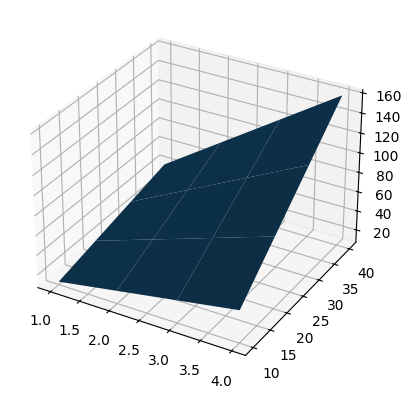

In [73]:
ax = plt.axes(projection='3d')
ax.plot_surface(X.T, Y.T, Z)

## 損失関数の可視化

In [198]:
x = df['space'].values
y = df['rent'].values

n0 = n1 = 300


min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
z = [cost_func(param[0], param[1], x, y) for param in product(theta_0, theta_1)]
Z = np.array(z).reshape(n0, n1)

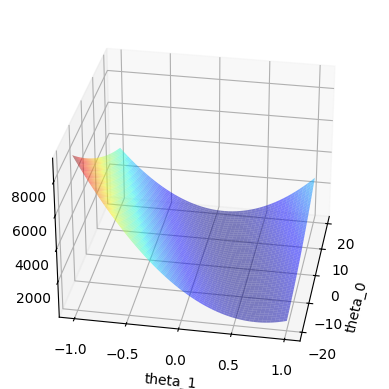

In [257]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

In [155]:
list(product(theta_0, theta_1))[0:3]

[(-20.0, -1.0), (-20.0, -0.9933110367892977), (-20.0, -0.9866220735785953)]

## 最急降下法をスクラッチで実装

In [240]:

#初期値（今回はランダムではない）
theta_0_init = -5
theta_1_init = -0.5


# 各thetaの最急降下法の更新関数
def update_theta0(theta0, theta1, x, y, alpha=0.05):
    return theta0 - alpha * 2 *  np.mean((theta0 + theta1 * x) - y)

def update_theta1(theta0, theta1, x, y, alpha=0.05):
    return theta1 - alpha * 2 *  np.mean(((theta0 + theta1 * x) - y) * x)


# iter回数と学習率
epochs = 100000
alpha = 0.00005

#iterごとの各thetaの値ホルダー
history_theta_0 = []
history_theta_1 = []
history_theta_0.append(theta_0_init)
history_theta_1.append(theta_1_init)


#実施
for _ in range(epochs):
    updated_theta_0 = update_theta0(history_theta_0[-1], history_theta_1[-1], x=x, y=y, alpha=alpha)
    updated_theta_1 = update_theta1(history_theta_0[-1], history_theta_1[-1], x=x, y=y, alpha=alpha)
    
    history_theta_0.append(updated_theta_0)
    history_theta_1.append(updated_theta_1)
    

## 結果の描画

In [256]:
#iter毎のloss値

#↓自分で設定
# def history_loss_accumration(history_theta_0, history_theta_1):
#     history_loss = []

#     for iter_num in range(len(history_theta_0)):
#         theta0_tmp = history_theta_0[iter_num]
#         theta1_tmp = history_theta_1[iter_num]

#         loss_tmp = cost_func(theta0_tmp, theta1_tmp, x, y)

#         history_loss.append(loss_tmp)
    
#     return history_loss

# history_loss = history_loss_accumration(history_theta_0, history_theta_1)

history_loss =  [cost_func(*param, x, y) for param in zip(history_theta_0, history_theta_1) ]


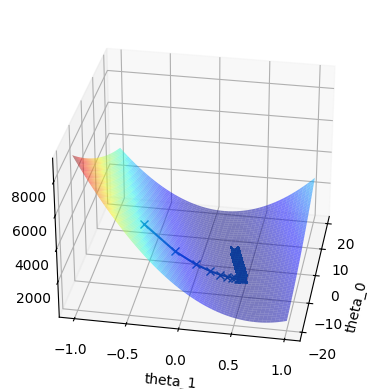

In [258]:
ax = plt.axes(projection='3d')
ax.plot(history_theta_0, history_theta_1, history_loss, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

Text(0.5, 0, 'theta_1')

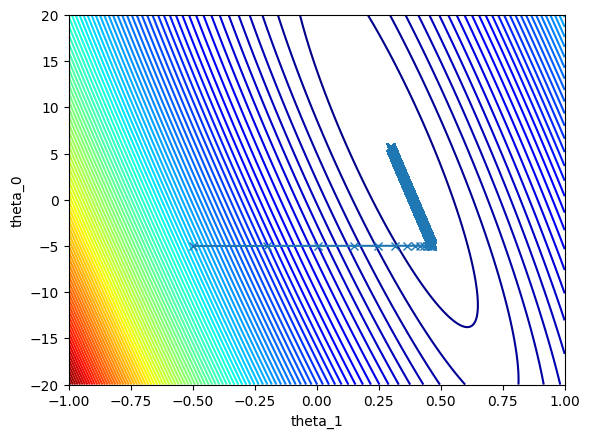

In [270]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap = 'jet')
plt.plot(history_theta_1, history_theta_0, 'x-')
plt.ylabel('theta_0')
plt.xlabel('theta_1')

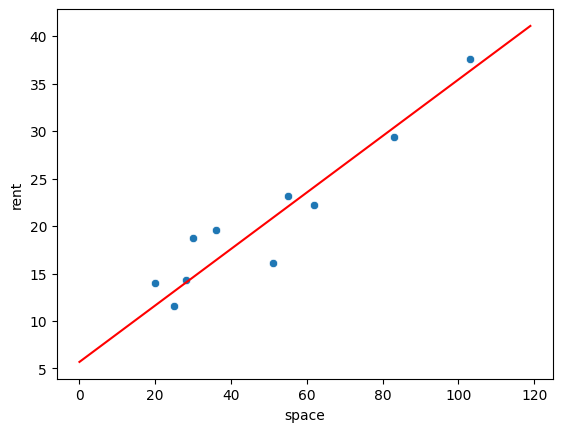

In [289]:
sns.scatterplot(x='space', y='rent', data=df)
x_values = np.arange(120)
y_values = history_theta_0[-1] + history_theta_1[-1] * x_values
plt.plot(x_values, y_values, '-', color='r')


## 正規方程式

In [307]:
X = np.vstack([np.ones(len(x)), x]).T

In [310]:
best_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.T)

Text(0.5, 0, 'theta_1')

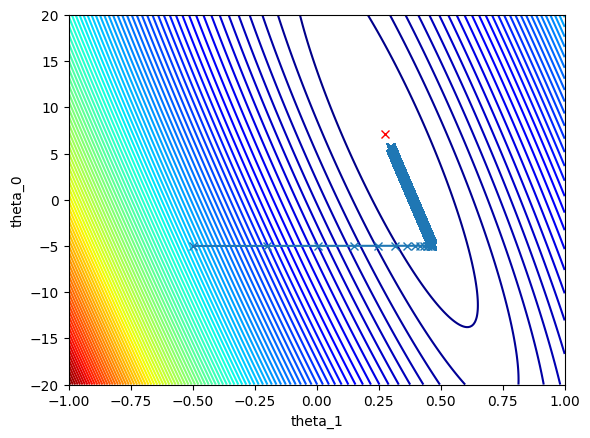

In [312]:
plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap = 'jet')
plt.plot(history_theta_1, history_theta_0, 'x-')
plt.plot(best_theta[1], best_theta[0], 'x', color='r')
plt.ylabel('theta_0')
plt.xlabel('theta_1')

## scikit-learnで線形回帰

In [313]:
from sklearn.linear_model import LinearRegression

In [326]:
model = LinearRegression()

#データの準備
x = df['space'].values
y = df['rent'].values
X = x.reshape(-1, 1)
model.fit(X, y)

LinearRegression()

In [327]:
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [328]:
model.coef_

array([0.27487161])

In [329]:
model.intercept_

7.09623249990884

## 特徴量スケーリング

In [330]:
# データのロード
df = pd.read_csv('../csv/sample_data2.csv')

In [331]:
X = df[['space', 'age']]

In [334]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [337]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [338]:
model = LinearRegression()
y = df['rent']
model.fit(X_scaled_df, y)

LinearRegression()

## 正規化

In [343]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)
scaler.fit_transform(X)

array([[0.        , 0.09090909],
       [0.06024096, 0.54545455],
       [0.09638554, 0.77272727],
       [0.12048193, 0.40909091],
       [0.19277108, 0.22727273],
       [0.37349398, 0.        ],
       [0.42168675, 0.18181818],
       [0.5060241 , 0.04545455],
       [0.75903614, 0.18181818],
       [1.        , 1.        ]])

In [342]:
pd.DataFrame(X_scaled, columns=X.columns)

,space,age
0,0.000000,0.090909
1,0.060241,0.545455
2,0.096386,0.772727
3,0.120482,0.409091
4,0.192771,0.227273
5,0.373494,0.000000
6,0.421687,0.181818
7,0.506024,0.045455
8,0.759036,0.181818
9,1.000000,1.000000
